In [1]:
#Import Dependencies
import warnings
warnings.simplefilter('ignore')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib

In [3]:
fb = pd.read_csv("Source/facebook_target.csv")
fb

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,LPost-Tot Reach,LPost-Tot Impressions,Lifetime Engaged Users,...,LPost-Liked Page Impressions,LPost-Liked Page Reach,LPeople-Post Like & Engange,comment,like,share,Total Interactions,success,Clus_km,Hier_clus
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,...,3078,1640,119,4,79.0,17.0,100,-0.561881,0,1
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,...,11710,6112,1108,5,130.0,29.0,164,-0.032857,0,1
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,...,2812,1503,132,0,66.0,14.0,80,-0.916288,0,1
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,...,61027,32048,1386,58,1572.0,147.0,1777,10.531193,1,0
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,...,6228,3200,396,19,325.0,49.0,393,1.906070,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,85093,Photo,3,1,7,10,0.0,5400,9218,810,...,5654,3230,422,10,125.0,41.0,176,0.564812,0,1
524,85093,Photo,3,1,7,2,0.0,4684,7536,733,...,4750,2876,392,5,53.0,26.0,84,-0.342549,0,1
525,81370,Photo,2,1,5,8,0.0,3480,6229,537,...,3961,2104,301,0,53.0,22.0,75,-0.743561,0,1
526,81370,Photo,1,1,5,2,0.0,3778,7216,625,...,4742,2388,363,4,93.0,18.0,115,-0.493550,0,1


# Assign the data to X and y combinacion Tr 89 Ts87 **Primera prueba**

X = fb[["LPost-Tot Impressions", "Lifetime Engaged Users", "LPost-Liked Page Impressions", "LPost-Liked Page Reach", 
        "LPeople-Post Like & Engange", "Total Interactions"]]
y = fb["success"].values.reshape(-1, 1)
print(X.shape, y.shape)

# Pre-processing and features selection

In [4]:
# Assign the data to X and y

X = fb[["Paid","LPost-Tot Reach","LPost-Tot Impressions", "Lifetime Engaged Users", "LPost-Liked Page Impressions", 
        "LPost-Liked Page Reach", "LPeople-Post Like & Engange", "Total Interactions"]]
y = fb["success"].values.reshape(-1, 1)
print(X.shape, y.shape)

(528, 8) (528, 1)


# Train and Test split

In [5]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
X_train.head()

,Paid,LPost-Tot Reach,LPost-Tot Impressions,Lifetime Engaged Users,LPost-Liked Page Impressions,LPost-Liked Page Reach,LPeople-Post Like & Engange,Total Interactions
19,0.0,1722,2981,163,1868,1050,123,54
353,1.0,11304,20647,1141,14792,7800,732,235
56,0.0,4940,9390,385,5860,2930,273,162
204,0.0,4480,8039,572,5014,2704,416,217
501,0.0,5240,8893,857,7420,4232,466,61


In [7]:
y_train

array([[-9.28885531e-01],
       [ 1.37738291e+00],
       [ 1.36632045e+00],
       [-5.67945670e-02],
       [-9.49663265e-01],
       [ 3.36367233e-01],
       [-9.97054782e-01],
       [ 6.39389178e-01],
       [-1.48404470e+00],
       [-1.47322681e-01],
       [-1.48404470e+00],
       [-8.86072764e-01],
       [-1.14285941e+00],
       [-9.89351792e-01],
       [-4.71809400e-01],
       [ 1.47013221e+00],
       [-7.42156530e-01],
       [-1.48404470e+00],
       [-2.63228728e-01],
       [-9.75019749e-01],
       [-5.19214762e-01],
       [-9.07629657e-01],
       [-1.05326612e+00],
       [ 3.10290176e+00],
       [-1.48404470e+00],
       [ 8.89099609e-01],
       [ 7.66803254e-01],
       [-1.00432116e-01],
       [ 2.04732739e-01],
       [ 6.61743448e+00],
       [-9.42739434e-01],
       [ 4.76459704e-01],
       [-4.36860175e-01],
       [-7.04370238e-01],
       [-7.92068888e-01],
       [-6.29263311e-01],
       [-9.21799786e-01],
       [ 2.47614873e+00],
       [-9.7

# Build the model

In [8]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
linRmodel = LinearRegression()
### END SOLUTION

In [9]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
linRmodel.fit(X_train, y_train)
training_score = linRmodel.score(X_train, y_train)
testing_score = linRmodel.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8938289228477558
Testing Score: 0.8682902384556255


Text(0.5, 1.0, 'Residual Plot')

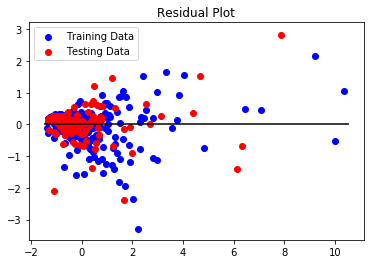

In [10]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(linRmodel.predict(X_train), linRmodel.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(linRmodel.predict(X_test), linRmodel.predict(X_test) - y_test, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [11]:
import joblib
filename = ('models/FBLinearRegression_model.sav')
joblib.dump(linRmodel,filename)

['models/FBLinearRegression_model.sav']